In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler



In [3]:
train = pd.read_csv('/content/Train.csv')
train.head(10)

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1
5,1,6.237,10,10,12,3,1,1
6,9,13.795,8,3,5,3,0,0
7,23,74.132,11,15,5,8,0,1
8,40,69.522,8,4,7,6,0,0
9,38,6.577,8,5,7,3,1,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  543 non-null    int64  
 1   Location_Score        543 non-null    float64
 2   Internal_Audit_Score  543 non-null    int64  
 3   External_Audit_Score  543 non-null    int64  
 4   Fin_Score             543 non-null    int64  
 5   Loss_score            543 non-null    int64  
 6   Past_Results          543 non-null    int64  
 7   IsUnderRisk           543 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 34.1 KB


In [5]:
train.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.576427,32.259346,8.189687,7.327808,7.046041,5.530387,0.613260,0.626151
std,14.722687,24.887291,3.312022,3.450667,3.156978,1.839124,0.764509,0.484270
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,13.565000,6.000000,5.000000,5.000000,4.000000,0.000000,0.000000
50%,14.000000,19.803000,8.000000,7.000000,7.000000,6.000000,1.000000,1.000000
75%,37.000000,62.594000,11.000000,10.000000,8.000000,7.000000,1.000000,1.000000
max,44.000000,80.809000,15.000000,15.000000,15.000000,13.000000,10.000000,1.000000


Identify Missing Values

In [6]:
train.isnull().sum()

City                    0
Location_Score          0
Internal_Audit_Score    0
External_Audit_Score    0
Fin_Score               0
Loss_score              0
Past_Results            0
IsUnderRisk             0
dtype: int64

Univariate Analysis

Individual analysis is done for continuous and descrete columns

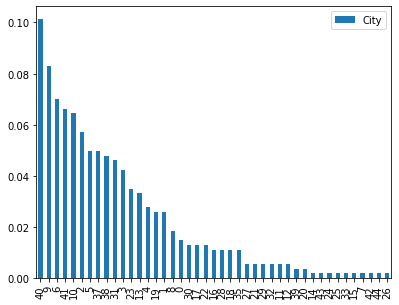

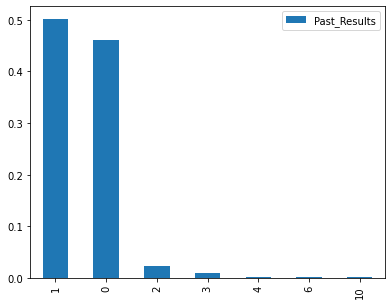

In [7]:
#For discrete columns

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
train.City.value_counts(normalize = True).plot.bar()
plt.legend()


plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 2)
train.Past_Results.value_counts(normalize=True).plot.bar()
plt.legend()
plt.show()


For Continuous Columns

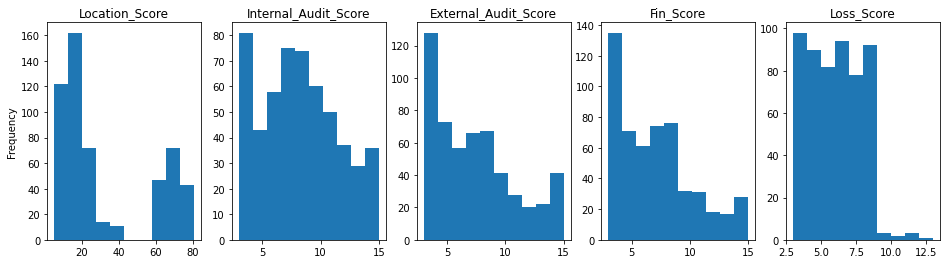

In [8]:
fig,axs = plt.subplots(1,5,figsize=(16,4))
axs[0].hist(train.Location_Score)
axs[0].set_title('Location_Score')
axs[0].set_ylabel('Frequency')
axs[1].hist(train.Internal_Audit_Score)
axs[1].set_title('Internal_Audit_Score')
axs[2].hist(train.External_Audit_Score)
axs[2].set_title('External_Audit_Score')
axs[3].hist(train.Fin_Score)
axs[3].set_title('Fin_Score')
axs[4].hist(train.Loss_score)
axs[4].set_title('Loss_Score')
plt.show()

Target Variable Plot

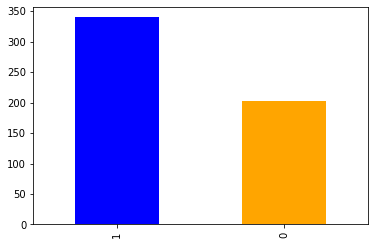

In [9]:
train.IsUnderRisk.value_counts().plot(kind = 'bar', color=['blue', 'orange'])

Bivariate Analysis

Scatter Plot

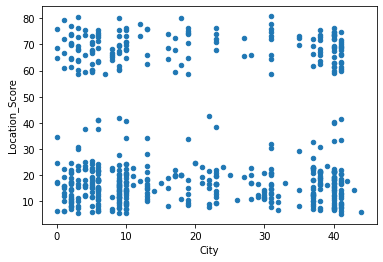

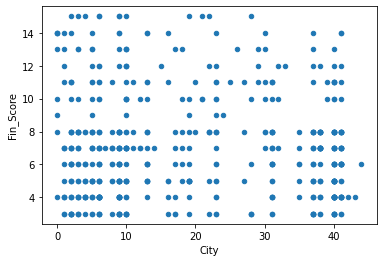

In [10]:
train.plot.scatter(x = 'City', y = 'Location_Score')
plt.show()

#plot the scatter plot of balance and age variable in data
train.plot.scatter(x="City",y="Fin_Score")
plt.show()

Pair Plot

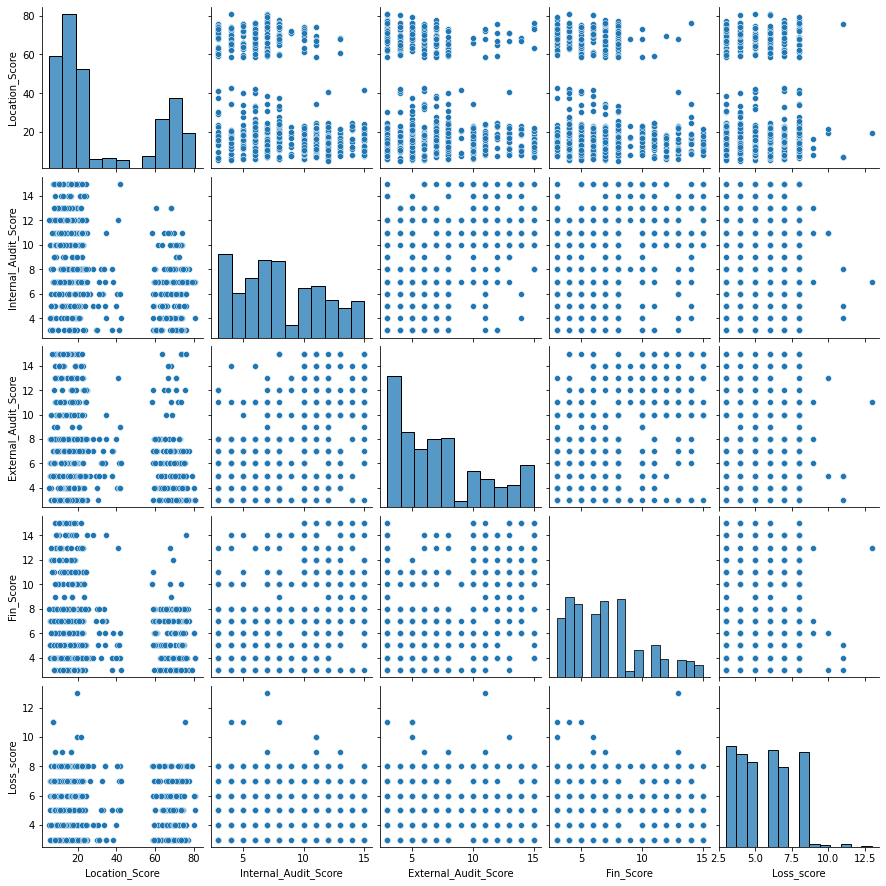

In [11]:
sns.pairplot(data = train, vars=['Location_Score','Internal_Audit_Score','External_Audit_Score', 'Fin_Score', 'Loss_score'])
plt.show()

Heat Map

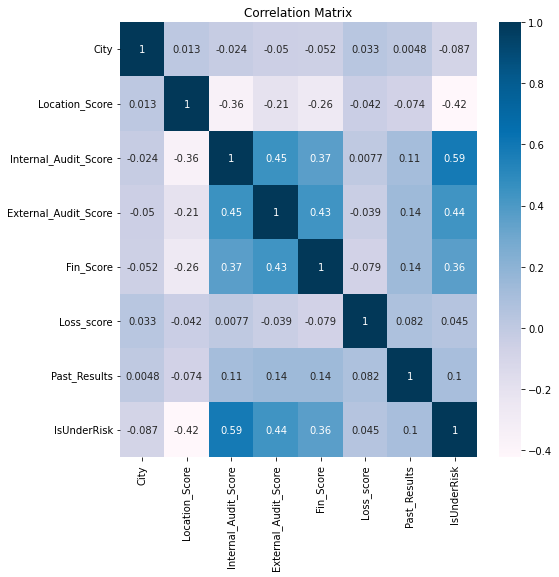

In [12]:
corr = train.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot = True, cmap = "PuBu")
plt.title('Correlation Matrix')
plt.show()

Spliting the data 

In [13]:
X = train.drop('IsUnderRisk', axis='columns')
y = train['IsUnderRisk']

Normalizing Data

In [14]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [15]:
from sklearn.model_selection import train_test_split

Spliting into train and test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Building DNN Model

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout
from keras.callbacks import EarlyStopping

In [33]:
model = tf.keras.Sequential()
model.add(Dense(128, input_shape=(7,),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1024      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,393
Trainable params: 11,393
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
early_stop = EarlyStopping(monitor='val_loss', verbose=1, patience= 2)

In [38]:
history_1 = model.fit(x=X_train, y=y_train, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/200
14/14 [==============================] - 0s 6ms/step - loss: 0.3529 - accuracy: 0.8318 - val_loss: 0.3545 - val_accuracy: 0.8073
Epoch 2/200
14/14 [==============================] - 0s 4ms/step - loss: 0.3619 - accuracy: 0.8180 - val_loss: 0.3539 - val_accuracy: 0.8073
Epoch 3/200
14/14 [==============================] - 0s 5ms/step - loss: 0.3491 - accuracy: 0.8295 - val_loss: 0.3533 - val_accuracy: 0.8073
Epoch 4/200
14/14 [==============================] - 0s 5ms/step - loss: 0.3472 - accuracy: 0.8341 - val_loss: 0.3531 - val_accuracy: 0.8073
Epoch 5/200
14/14 [==============================] - 0s 5ms/step - loss: 0.3468 - accuracy: 0.8318 - val_loss: 0.3528 - val_accuracy: 0.8073
Epoch 6/200
14/14 [==============================] - 0s 4ms/step - loss: 0.3521 - accuracy: 0.8341 - val_loss: 0.3530 - val_accuracy: 0.8073
Epoch 7/200
14/14 [==============================] - 0s 5ms/step - loss: 0.3557 - accuracy: 0.8387 - val_loss: 0.3525 - val_accuracy: 0.8165
Epoch 8/200
1

In [ ]:
plt.plot(history_1.history['loss'], label='Loss')
plt.plot(history_1.history['accuracy'], label = 'Accuracy')
plt.show()

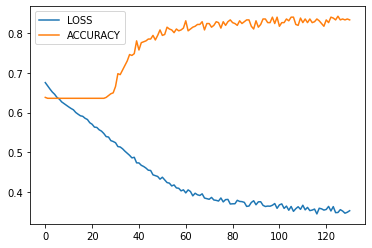

In [37]:
plt.plot(history1.history['loss'], label="LOSS")
plt.plot(history1.history['accuracy'], label="ACCURACY")
plt.legend(loc='best')
plt.show()

Evaluate the model

In [26]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.3497 - accuracy: 0.8257


[0.3496827185153961, 0.8256880640983582]

Prediction on test set

In [39]:
y_pred=model.predict(X_test)

In [41]:
y_prob = np.argmax(y_pred, axis=1)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
cr = classification_report(y_test, y_prob)
cm = confusion_matrix(y_test, y_prob)
rc = roc_auc_score(y_test, y_prob)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
print(cr)

              precision    recall  f1-score   support

           0       0.41      1.00      0.58        45
           1       0.00      0.00      0.00        64

    accuracy                           0.41       109
   macro avg       0.21      0.50      0.29       109
weighted avg       0.17      0.41      0.24       109



In [44]:
print(cm)

[[45  0]
 [64  0]]


In [48]:
print(rc)

0.5


One Hot Encoding the target variable

In [49]:
from sklearn.preprocessing import OneHotEncoder
y_ = np.array(train['IsUnderRisk']).reshape(-1,1)
encoder= OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

In [50]:
x_train, x_test,y_train, y_test = train_test_split(X, y, test_size=0.20)

In [51]:
model = tf.keras.Sequential()
model.add(Dense(128, input_shape=(7,),activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [52]:
model.compile(optimizer ='sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [53]:
history_2 = model.fit(x=x_train, y=y_train, epochs=100)

Epoch 1/100
14/14 [==============================] - 1s 3ms/step - loss: 0.6962 - accuracy: 0.4032
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6905 - accuracy: 0.5069
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.6175
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6764 - accuracy: 0.6313
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6693 - accuracy: 0.6313
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6632 - accuracy: 0.6313
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.6313
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6531 - accuracy: 0.6313
Epoch 9/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6487 - accuracy: 0.6313
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6446 - accuracy: 0.6313
Epoch 11/

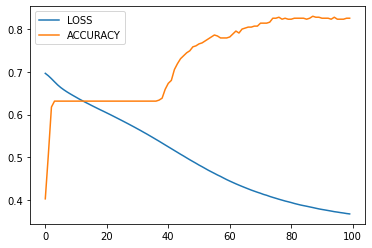

In [54]:
plt.plot(range(100), history_2.history['loss'], label="LOSS")
plt.plot(range(100), history_2.history['accuracy'], label="ACCURACY")
plt.legend(loc='best')
plt.show()

In [58]:
y_pred=model.predict(x_test)
y_pred



array([[9.98301432e-03, 9.90016997e-01],
       [2.62512807e-02, 9.73748744e-01],
       [5.78009844e-01, 4.21990156e-01],
       [7.44865043e-04, 9.99255121e-01],
       [7.48271346e-01, 2.51728714e-01],
       [8.47097695e-01, 1.52902275e-01],
       [1.70181593e-05, 9.99982953e-01],
       [7.25469351e-01, 2.74530649e-01],
       [1.70553729e-01, 8.29446256e-01],
       [7.71363616e-01, 2.28636369e-01],
       [9.21428561e-01, 7.85714760e-02],
       [2.67478754e-04, 9.99732554e-01],
       [6.32938385e-01, 3.67061615e-01],
       [3.59206200e-02, 9.64079380e-01],
       [2.21451521e-01, 7.78548539e-01],
       [7.06261814e-01, 2.93738127e-01],
       [3.90798692e-03, 9.96092021e-01],
       [1.27511755e-01, 8.72488260e-01],
       [9.28926826e-01, 7.10730925e-02],
       [1.20424747e-03, 9.98795748e-01],
       [1.18318520e-01, 8.81681502e-01],
       [1.14619620e-01, 8.85380387e-01],
       [9.03340936e-01, 9.66590717e-02],
       [5.24991274e-01, 4.75008667e-01],
       [3.447098

In [60]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.4054 - accuracy: 0.8073


[0.4053579270839691, 0.8073394298553467]

In [61]:
from sklearn.metrics import log_loss

In [62]:
log_loss(y_test,y_pred)

0.4242920890956324